### 1. About Dataset
This dataset contains various attributes of songs, such as their audio features, popularity, artist, album, release date, and more.  It allows for in-depth analysis and offers valuable insights into music trends.
#### Features
- **genre**: the actual genre of each track
- **artist_name**: Artist(s) responsible for creating the track
- **track_name**: actual name of the track
- **track_id**: the actual id of the track
- **popularity**: represent the popularity of the track
- **acousticness**: An acoustic confidence measure of each track ranging from 0.0 to 1.0 is provided for the track. 1.0 signifies a significant level.
- **danceability**: the track's suitability for dancing, which is determined by analyzing various musical elements (0.0 to 1.0)
- **duration_ms**: the actual duration of the track in miliseconds
- **energy**: the intensity and activity level of a track (0.0 to 1.0), with higher values indicating tracks that are more energetic.
- **instrumentalness**: the probability of a track being instrumental
- **key**: indicates the key in which the track is played. It's a numerical value that falls within a range of 0 to 11, representing different musical keys.
- **liveness**: Determines the existence of an engaged crowd during the recording. The value ranges from 0.0 to 1.0, where higher values suggest a greater likelihood of the track being performed live. 
- **loudness**: the perceived volume or intensity of a track
- **mode**: the actual mode of each track ( major, minor)
- **speechiness**: It identifies the occurrence of spoken words in a track. The attribute value is closer to 1.0 when the recording is more speech-like, such as in a talk show, audio book, or poetry. Values exceeding 0.66 indicate tracks that likely consist predominantly of spoken words. Values ranging from 0.33 to 0.66 indicate tracks that potentially have a combination of music and speech, such as rap music, either in sections or layered. Values that fall below 0.33 are typically indicative of music and other tracks that do not resemble speech.
- **tempo**: the speed or pace at which the track is played or performed (per minute).
- **time_signature**: The time-signature of a particular track, which determines the number of beats in each measure and the type of note that receives one beat.
- **variance**: The uplifting nature of the song's musical content





### 2. Exploratory Data Analysis
Exploring the dataset is an essential step in the early stages of a data analysis project. It allows for a thorough understanding of the data, identification of any potential problems, and discovery of meaningful patterns. In this section, we will thoroughly examine the dataset to establish a solid foundation for future modeling and analysis.

In [2]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### a/ Data Loading and Inspection:
    

- The dataset SpotifyFeatures.cvs will be loaded into a Pandas DataFrame

In [3]:
# Load the 'SpotifyFeatures.csv' dataset into a Pandas DataFrame
data = pd.read_csv('SpotifyFeatures.csv')



- Upon first examination, the dataset's dimensions, including the number of rows and columns, can be determined.

In [4]:
# Display the number of rows and columns in the dataset
print(data.shape)

(232725, 18)


- The first few rows will be displayed to get a glimpse of the data's structure and content.

In [5]:
# Display the first 5 rows of the dataset
# This is useful to understand the data's structure, column names, and sample values
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [6]:
# drop column track_id because our model does not need this information
data = data.drop(columns=['track_id'])

#### b/ Data Cleaning and Preprocessing

- **Handling Missing Values**: A thorough assessment of missing values will be conducted. If necessary, appropriate imputation or removal strategies will be applied.

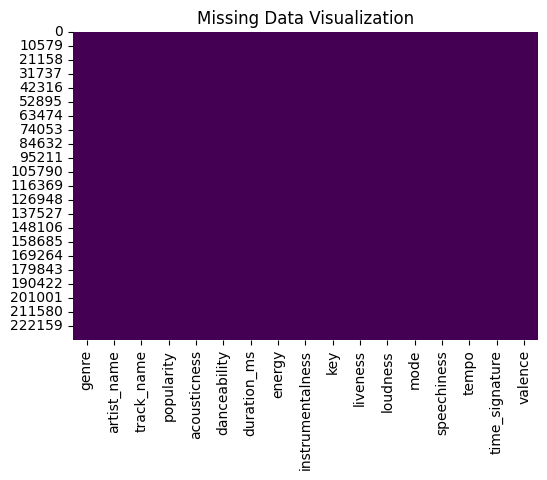

Missing Data Counts:
 genre               0
artist_name         0
track_name          1
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [7]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

It appears that there is a missing value in this dataset, specifically in the track_name field. Thus, it is necessary to address the issue of missing values by removing them from the dataset. This is because the missing values are only a single row, which is a very small portion of the entire dataset.

- **Handeling missing values**

In [8]:
# Dropping null values from multiple columns ('tempo' and 'other_column')
data = data.dropna(subset=['track_name'])

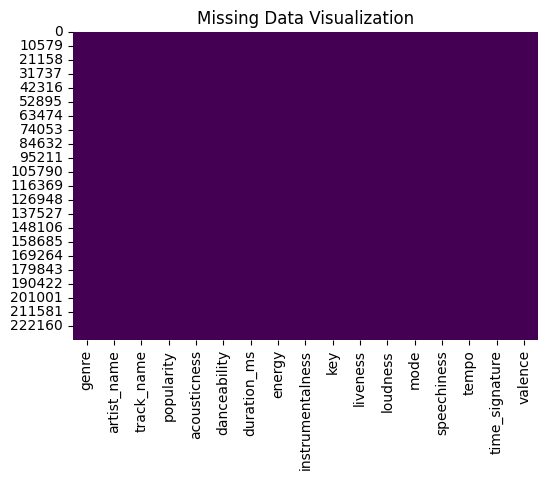

Missing Data Counts:
 genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [9]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

- **Identifying and Addressing Duplicates**:
Duplicate values can result in a redundant dataset, which can increase the computational cost without improving the algorithm's performance. Therefore, We need to identify and eliminate duplicate rows to maintain the integrity of the data. 

In [10]:
# Identify duplicate data
duplicate_rows = data[data.duplicated()]

# Display duplicate rows if they exist
if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicated rows found.")

# Print the count of duplicate rows
print(f"\nNumber of Duplicated Rows: {len(duplicate_rows)}")


No duplicated rows found.

Number of Duplicated Rows: 0


There is no duplicated rows, so we do not need to drop any rows.

#### Data Information

In [11]:
# the information of first ten columns
data[data.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   popularity        232724 non-null  int64  
 4   acousticness      232724 non-null  float64
 5   danceability      232724 non-null  float64
 6   duration_ms       232724 non-null  int64  
 7   energy            232724 non-null  float64
 8   instrumentalness  232724 non-null  float64
 9   key               232724 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 19.5+ MB


In [12]:
# The information of remaining columns
data[data.columns[10:]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   liveness        232724 non-null  float64
 1   loudness        232724 non-null  float64
 2   mode            232724 non-null  object 
 3   speechiness     232724 non-null  float64
 4   tempo           232724 non-null  float64
 5   time_signature  232724 non-null  object 
 6   valence         232724 non-null  float64
dtypes: float64(5), object(2)
memory usage: 14.2+ MB


In [13]:
numerical_columns = data.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

print(f"Number of columns with numerical values: {num_numerical_columns}")

Number of columns with numerical values: 11


In [14]:
integer_columns = [col for col in data.columns if pd.api.types.is_integer_dtype(data[col])]
num_integer_columns = len(integer_columns)

print(f'Number of columns with integer values: {num_integer_columns}')

Number of columns with integer values: 2


### Column and Dtype Logic
This dataset contains both numeric and categorical data types:

- **Numeric Columns**: These columns are used for quantitative measurements and include both integers (int64) and floating-point numbers (float64). These floating-point columns typically represent various audio characteristics of tracks, while the integer columns represent the popularity and the duration of tracks in milliseconds.
- **Categorical Columns**: These columns contain qualitative data (object) and are used to represent categories such as key, mode, and so on.

Numeric and Category Columns
- **Numeric Columns**: 11 (9 floating point + 2 integers)
    - **Integers (int64)**: There are 2 columns containing integer data, which includes measurements like popularity and duration_ms
    - **Floating-point**: There are 9 columns containing floating-point data, such as speechiness, tempo and so on.

- **Categorical Columns**: 6 
    - There are 6 columns containing categorical data (object), representing categories such as genre, artist_name, track_name, key, mode, time_signature
    
The dataset provides a comprehensive overview of various factors that might influence the popularity level of a track, combining both quantitative and qualitative aspects. 

#### General Evaluation for Numeric Values 

In [15]:
# Select numeric data
numeric_data = data.select_dtypes(include='number').columns
print("numeric_data", numeric_data)


numeric_data Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


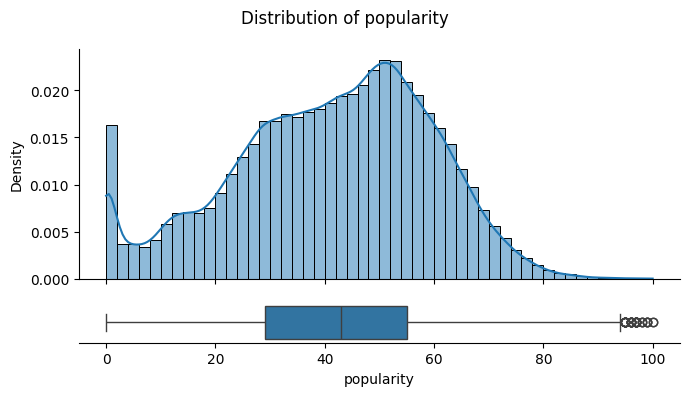

**Detailed Analysis for 'popularity'**
There is a noticeable spike in the 0-10 range, indicating that a large number of tracks have extremely low popularity
There is a gradual and widespread increase from 20 to 60, suggesting a moderate level of popularity for many tracks
Another notable peak is observed around 50-60, indicating a significant number of tracks with moderate popularity.
The extended tail reaching towards 100 suggests a decrease in the number of tracks that have gained significant popularity
There are some tracks that stand out at the higher end, suggesting they have exceptionally high popularity.


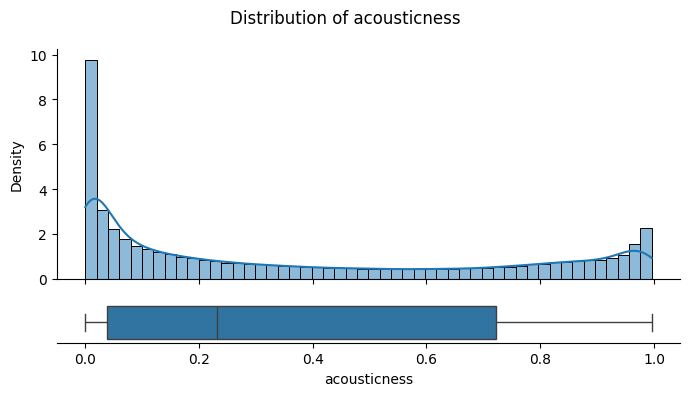

**Detailed Analysis for 'acousticness'**
The distribution of acoustiness is left-skewed, which indicates that most tracks have low acousticness.
The interquartile range (IQR) covers a range of approximately 0.0 to 0.4, suggesting that the middle 50% of the dataset is contained within this interval.
All values in this plot fall within the whiskers, indicating that there are no significant outliers.


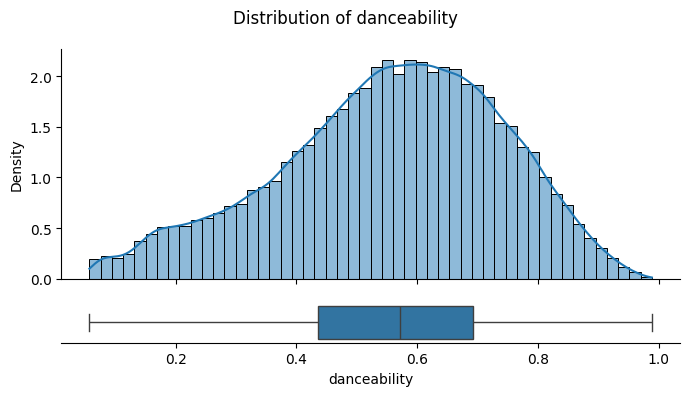

**Detailed Analysis for 'danceability'**
The distribution of danceability has a normal-like distribution, which centered around the middle range
There is a noticeable concentration of values around 0.6, suggesting that a significant number of tracks have a danceability score ranging from moderate to high.
The density gradually rises from lower values (0.1 to 0.4) and then declines after reaching a peak around 0.6.
There are no significant outliers.


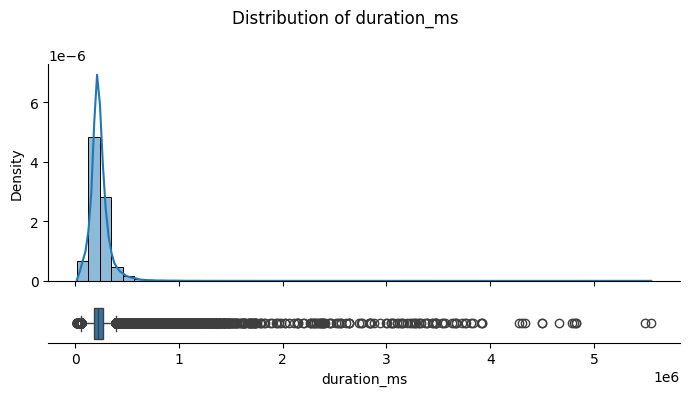

**Detailed Analysis for 'duration_ms'**
The duration_ms distribution is heavily skewed to the right, suggesting that the majority of tracks have shorter durations, while a small number of tracks have much longer durations.
The majority of tracks have short durations.
However, there are tracks with a wide range of durations (outliers with sustantially longer durations.)


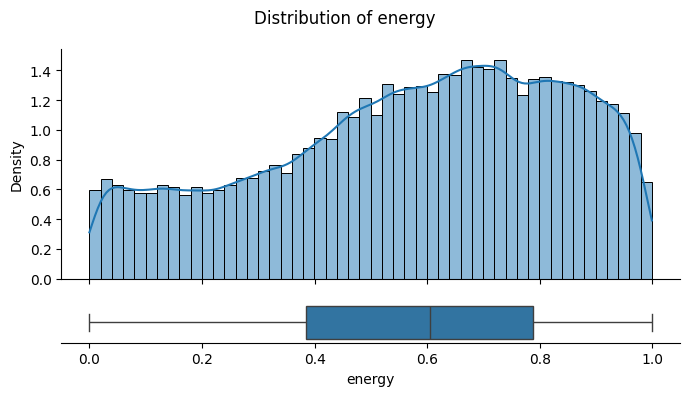

**Detailed Analysis for 'energy'**
The distribution of energy scores in the dataset appears to be fairly even, with a slight tendency towards higher energy levels.
Most tracks display moderate to high energy values, with a peak around 0.6 to 0.7, suggesting that a significant number of tracks are quite energetic.


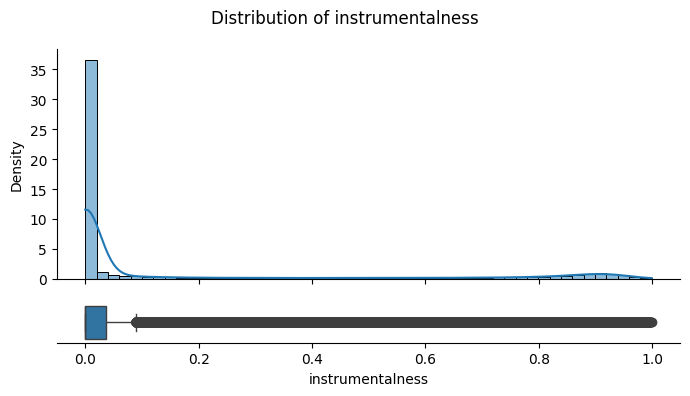

**Detailed Analysis for 'instrumentalness'**
Most tracks exhibit a significant lack of instrumentalness, as evident from the peak in the distribution plot and the clustering of values towards the lower end of the boxplot.
The range of values indicates that there are tracks with a diverse range of instrumentalness, including several outliers with notably higher values.


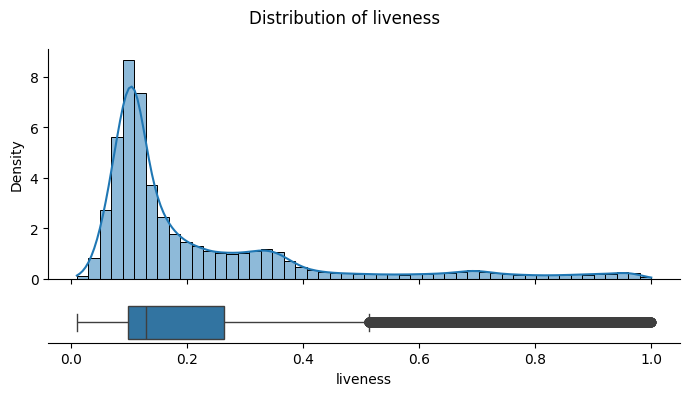

**Detailed Analysis for 'liveness'**
The distribution of liveness is right-skewed, suggesting that the majority of tracks have relatively low to moderate liveness values.
The distribution of values indicates that there are tracks exhibiting a diverse range of liveness, including several outliers with notably higher values.


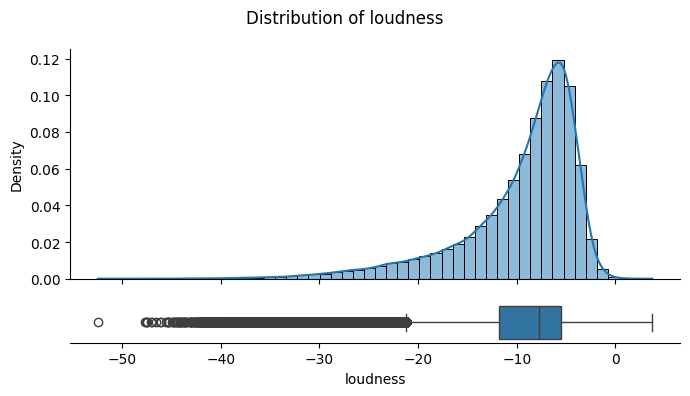

**Detailed Analysis for 'loudness'**
The left-skewed distribution suggests that while most tracks are relatively loud, there are some tracks with very low loudness, creating a long tail in the distribution plot.
There are a significant number of outliers


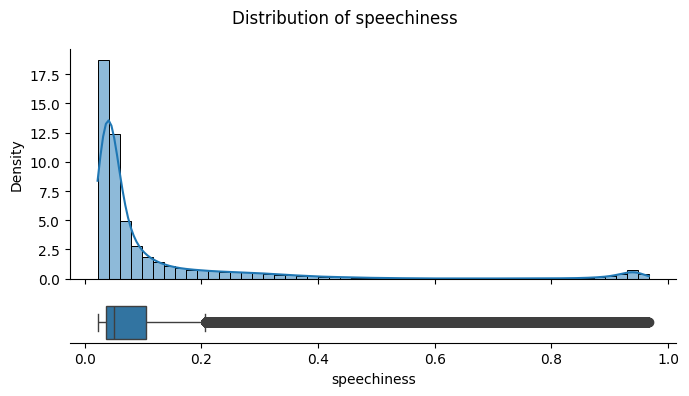

**Detailed Analysis for 'speechiness'**
Although the majority of the songs are not highly speechy, the right-skewed distribution indicates that there are some tracks that are extremely speechy, which adds length to the distribution plot's tail.
There are a significant number of outliers 


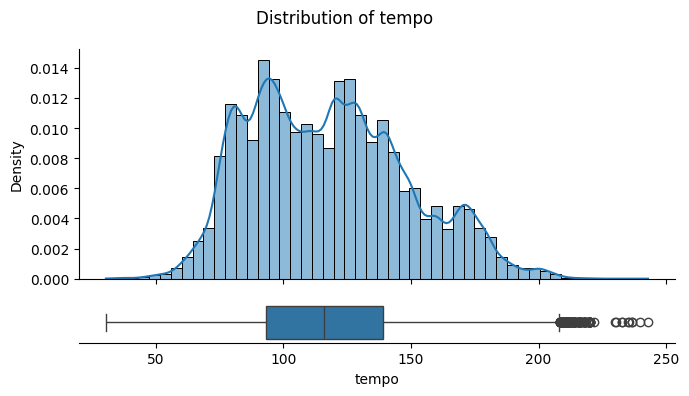

**Detailed Analysis for 'tempo'**
Most tracks fall within the tempo range of 95 to 130 BPM, with notable spikes at around 100 and 120 BPM. This suggests that a large number of tracks have a moderate to fast tempo.
There are a number of outliers which are tracks that has very fast speed


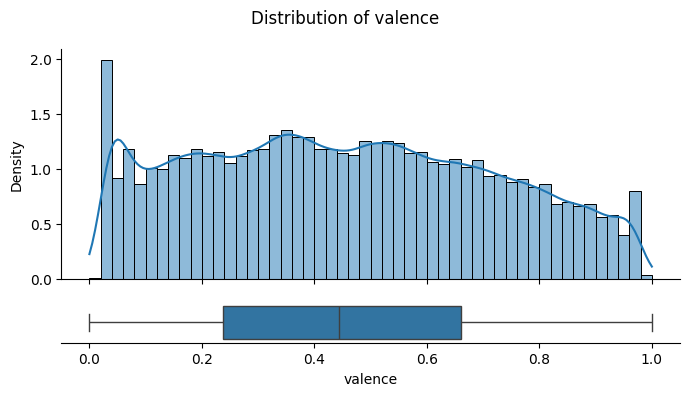

**Detailed Analysis for 'valence'**
The valence values cover the entire range from 0 to 1, suggesting a diverse range of emotional tones in the tracks.
The distribution of valence values in the tracks appears to be fairly even, indicating a balanced spread. However, there is a slight tendency towards lower values.
Based on the data, it seems that there are not many extreme valence values, which is quite normal.


In [18]:
def plot_hist_box(data, col):
    fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True,
                                        gridspec_kw={"height_ratios": (.85, .15)},
                                        figsize=(7, 4))

    sns.histplot(x=data[col], bins=50, kde=True, stat='density', ax=ax_hist)
    sns.despine(ax=ax_hist)

    # Plot boxplot
    sns.boxplot(x=data[col], ax=ax_box)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_box, left=True)

    # Adjust layout
    plt.suptitle(f'Distribution of {col}')
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    if col == 'popularity':
        print(f"**Detailed Analysis for '{col}'**")
        print("There is a noticeable spike in the 0-10 range, indicating that a large number of tracks have extremely low popularity\nThere is a gradual and widespread increase from 20 to 60, suggesting a moderate level of popularity for many tracks\nAnother notable peak is observed around 50-60, indicating a significant number of tracks with moderate popularity.\nThe extended tail reaching towards 100 suggests a decrease in the number of tracks that have gained significant popularity\nThere are some tracks that stand out at the higher end, suggesting they have exceptionally high popularity.")
        
    elif col == 'acousticness':
        print(f"**Detailed Analysis for '{col}'**")
        print('The distribution of acoustiness is left-skewed, which indicates that most tracks have low acousticness.\nThe interquartile range (IQR) covers a range of approximately 0.0 to 0.4, suggesting that the middle 50% of the dataset is contained within this interval.\nAll values in this plot fall within the whiskers, indicating that there are no significant outliers.')
        
    elif col == 'danceability':
        print(f"**Detailed Analysis for '{col}'**")
        print("The distribution of danceability has a normal-like distribution, which centered around the middle range\nThere is a noticeable concentration of values around 0.6, suggesting that a significant number of tracks have a danceability score ranging from moderate to high.\nThe density gradually rises from lower values (0.1 to 0.4) and then declines after reaching a peak around 0.6.\nThere are no significant outliers.")
        
    elif col == 'duration_ms':
        print(f"**Detailed Analysis for '{col}'**")
        print("The duration_ms distribution is heavily skewed to the right, suggesting that the majority of tracks have shorter durations, while a small number of tracks have much longer durations.\nThe majority of tracks have short durations.\nHowever, there are tracks with a wide range of durations (outliers with sustantially longer durations.)")
    
    elif col == 'energy':
        print(f"**Detailed Analysis for '{col}'**")
        print("The distribution of energy scores in the dataset appears to be fairly even, with a slight tendency towards higher energy levels.\nMost tracks display moderate to high energy values, with a peak around 0.6 to 0.7, suggesting that a significant number of tracks are quite energetic.")
    
    elif col == 'instrumentalness':
        print(f"**Detailed Analysis for '{col}'**")
        print("Most tracks exhibit a significant lack of instrumentalness, as evident from the peak in the distribution plot and the clustering of values towards the lower end of the boxplot.\nThe range of values indicates that there are tracks with a diverse range of instrumentalness, including several outliers with notably higher values.")
    
    elif col == 'liveness':
        print(f"**Detailed Analysis for '{col}'**")
        print("The distribution of liveness is right-skewed, suggesting that the majority of tracks have relatively low to moderate liveness values.\nThe distribution of values indicates that there are tracks exhibiting a diverse range of liveness, including several outliers with notably higher values.")
    
    elif col == 'loudness':
        print(f"**Detailed Analysis for '{col}'**")
        print("The left-skewed distribution suggests that while most tracks are relatively loud, there are some tracks with very low loudness, creating a long tail in the distribution plot.\nThere are a significant number of outliers")
    
    elif col == 'speechiness':
        print(f"**Detailed Analysis for '{col}'**")
        print("Although the majority of the songs are not highly speechy, the right-skewed distribution indicates that there are some tracks that are extremely speechy, which adds length to the distribution plot's tail.\nThere are a significant number of outliers ")
    
    elif col == 'tempo':
        print(f"**Detailed Analysis for '{col}'**")
        print("Most tracks fall within the tempo range of 95 to 130 BPM, with notable spikes at around 100 and 120 BPM. This suggests that a large number of tracks have a moderate to fast tempo.\nThere are a number of outliers which are tracks that has very fast speed")
    else:
        print(f"**Detailed Analysis for '{col}'**")
        print("The valence values cover the entire range from 0 to 1, suggesting a diverse range of emotional tones in the tracks.\nThe distribution of valence values in the tracks appears to be fairly even, indicating a balanced spread. However, there is a slight tendency towards lower values.\nBased on the data, it seems that there are not many extreme valence values, which is quite normal.")
         
       

for col in numeric_data:
    plot_hist_box(data, col)

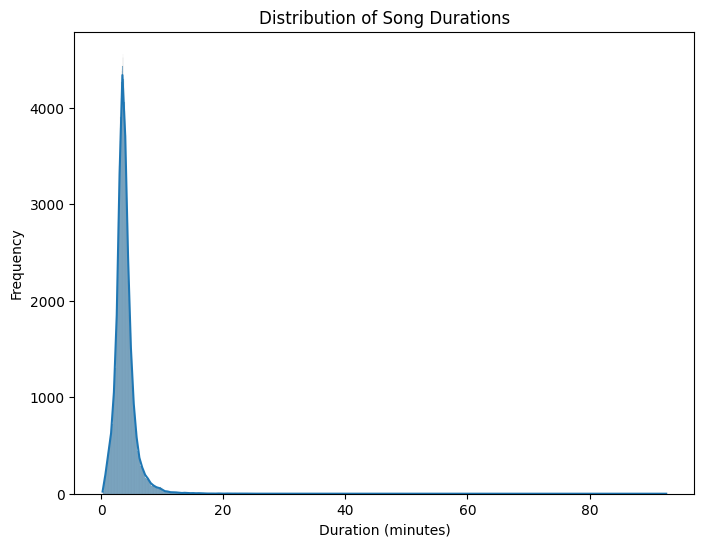

In [16]:
# the duration of track in minute
plt.figure(figsize=(8, 6))
sns.histplot(data['duration_ms'] / (1000 * 60), kde=True)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

In [17]:
from scipy.stats import skew
skewness = data.select_dtypes(include='number').apply(skew)
print(skewness)

popularity         -0.336385
acousticness        0.534232
danceability       -0.378286
duration_ms         9.893359
energy             -0.400226
instrumentalness    1.819748
liveness            2.074073
loudness           -1.662191
speechiness         3.311240
tempo               0.403355
valence             0.144129
dtype: float64


It's evident that we have some skewed features. It is worth mentioning that the 'duration_ms' feature exhibits a significant right-skewness, suggesting that there are a small number of songs with unusually long durations compared to the majority. Similarly, 'instrumentalness', 'liveness', and 'speechiness' also show a clear right-skewness pattern, indicating that there is a high concentration of low values with a long tail of higher values. We will address the skewness by transforming the features that are skewed.

#### General Evaluation For Categorical Values

In [18]:
# Select categorical data
categorical_data = data.select_dtypes(exclude='number').columns
print("categorical_data", categorical_data)

categorical_data Index(['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature'], dtype='object')


In [19]:
for col in categorical_data:
    unique_values = data[col].unique()

    # Print unique values for the current column
    print(f"\nUnique Values in Column '{col}':")
    print(unique_values)

    # Optionally, print the value counts if needed
    # print(data[col].value_counts())


Unique Values in Column 'genre':
['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']

Unique Values in Column 'artist_name':
['Henri Salvador' 'Martin & les fées' 'Joseph Williams' ... 'Dharmasoul'
 'Swim' 'Jr Thomas & The Volcanos']

Unique Values in Column 'track_name':
["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"]

Unique Values in Column 'key':
['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']

Unique Values in Column 'mode':
['Major' 'Minor']

Unique Values in Column 'time_signature':
['4/4' '5/4' '3/4' '1/4' '0/4']


- **Genre**

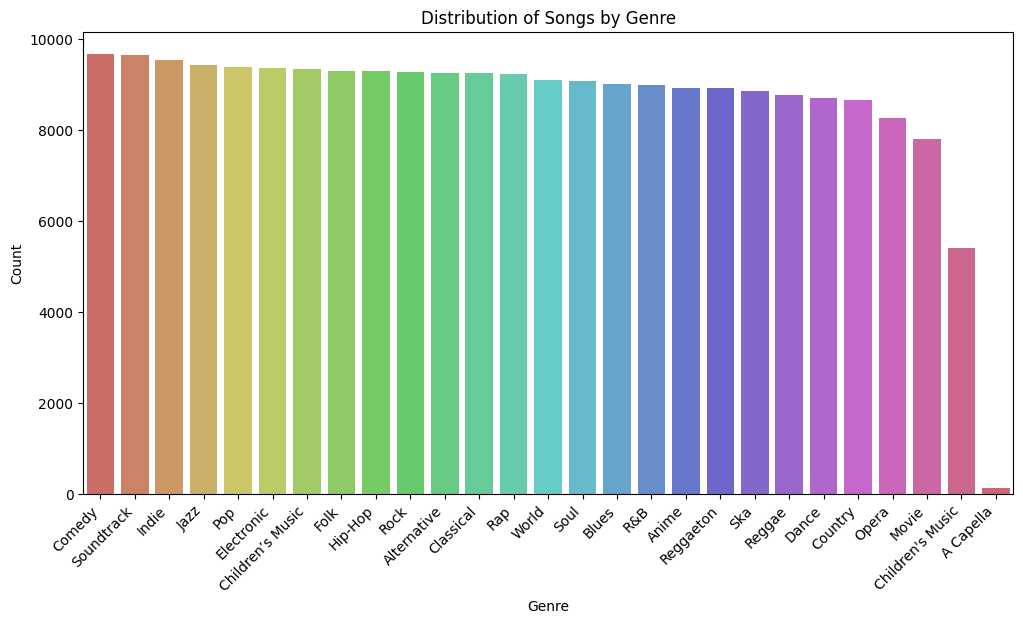

In [20]:
# Illustrating Genre
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='genre', order=data['genre'].value_counts().index, palette="hls" )
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Songs by Genre')
plt.show()

In general, Spotify provides a lot of music genres on their platforms. Moreover, Comedy, Soundtrack, Indie, Jazz, Pop, Electronic, Children's Music, Folk, Hip-Hop, Rock, and Alternative are some of the most common genres found in the dataset.

- **Artist Name**

In [21]:
# Artits name and their number of songs
artist_counts = data['artist_name'].value_counts()
print(artist_counts)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: count, Length: 14564, dtype: int64


Since there is a significant number of artist in this dataset, I think it is more reasonable to just illustrate top twenty artist who has the highest number of tracks in this Spotify's dataset.

In [22]:
# Visualization of top twenty artists based on their number of tracks
top20_artist = artist_counts.head(20)
print(top20_artist)

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
Ludwig van Beethoven        596
Hans Zimmer                 559
Gioachino Rossini           491
Chorus                      480
Howard Shore                479
Drake                       477
Henri Salvador              474
John Williams               450
Frédéric Chopin             436
Alan Menken                 420
Name: count, dtype: int64


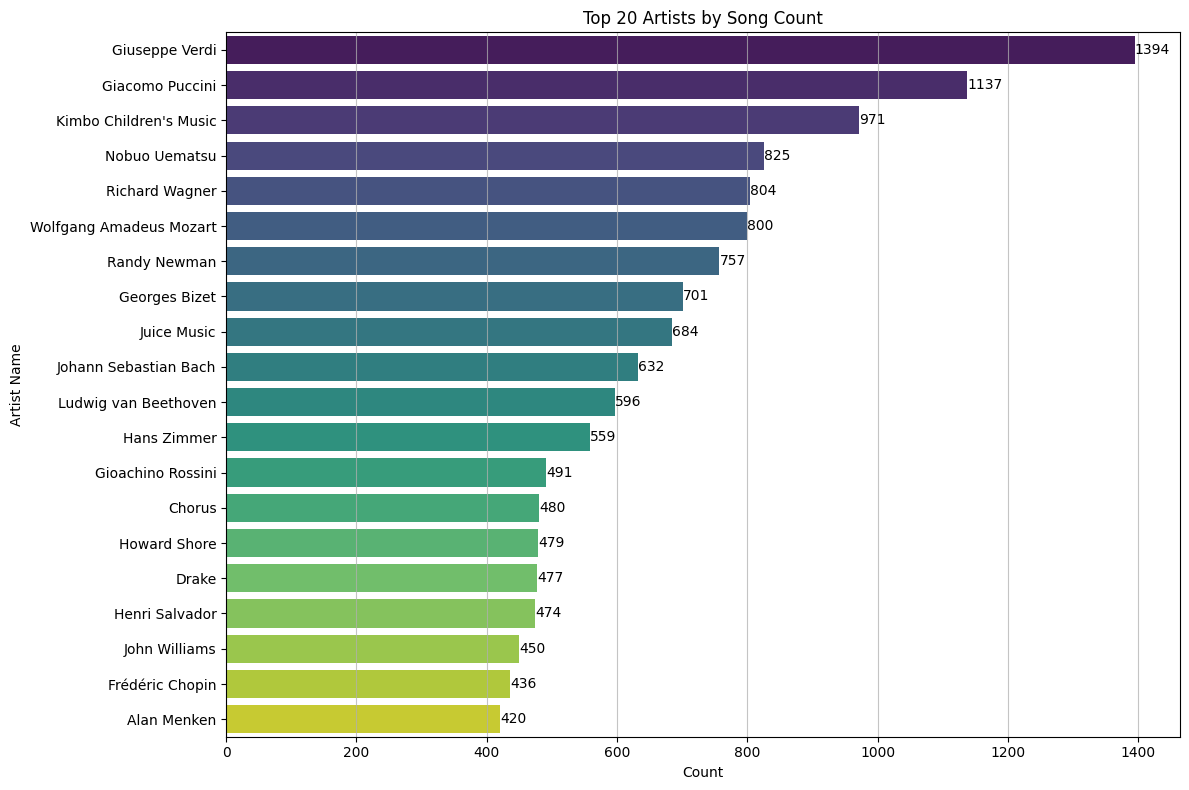

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top20_artist.values, y=top20_artist.index,palette="viridis")

# Enhance plot appearance
plt.xlabel("Count")
plt.ylabel("Artist Name")
plt.title("Top 20 Artists by Song Count")
plt.grid(axis='x', alpha=0.75)  # Add horizontal grid

# Add count annotations
for index, value in enumerate(top20_artist.values):
    ax.text(value, index, f'{value}', va='center')

# Display the plot
plt.tight_layout()
plt.show()

There is a vast number of artists who have uploaded their tracks on the Spotify platform. Furthermore, it is evident that Giuseppe Verdi made a significant contribution with a staggering 1394 tracks, surpassing the combined total of artists ranked 15 and below by threefold.

- **Names of Tracks in the Spotify Dataset**
Similar to the artist_name column, there are also an enormous unique values in such column, thus it is not efficent to visualize all the values. In this data exploration, I will only visualize top 20 tracks based on their occurences

In [24]:
track_counts = data['track_name'].value_counts()
track_counts

track_name
Home                                                           100
You                                                             71
Intro                                                           69
Stay                                                            63
Wake Up                                                         59
                                                              ... 
Siegfried / Zweiter Aufzug: Vorspiel                             1
Die Walküre / Zweiter Aufzug: "Siegmund! Sieh auf mich!"         1
Puccini: Tosca, Act 1: "Ah! Finalmente!" (Angelotti) [Live]      1
Harpsichord Sonata No. 11 in F Major: I. Moderato                1
You Don't Have To Hurt No More                                   1
Name: count, Length: 148614, dtype: int64

In [25]:
# Visualization of top 20 tracks based on their occurencies
top20_track = track_counts.head(20)
print(top20_track)

track_name
Home           100
You             71
Intro           69
Stay            63
Wake Up         59
Closer          58
Forever         57
Without You     56
Smile           55
Beautiful       50
Hold On         46
Breathe         45
Runaway         45
Run             45
Lullaby         44
Roses           43
Falling         43
Trouble         43
Believe         43
Paradise        43
Name: count, dtype: int64


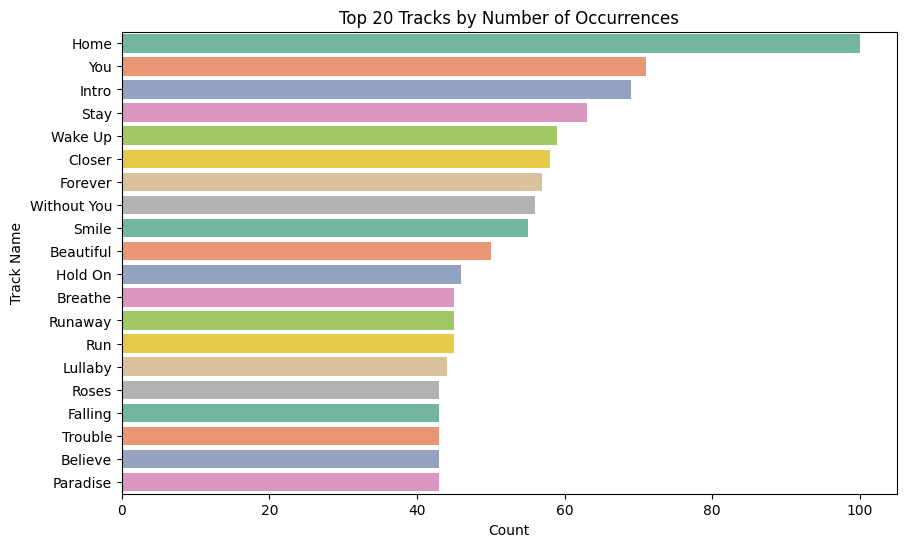

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top20_track.values, y=top20_track.index, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Track Name')
plt.title('Top 20 Tracks by Number of Occurrences')
plt.show()

It is clear to see that tracks on Spotify have diversity of name. Moreover, the counts for the top 20 tracks are quite similar to each other, except for "Home," which stands out noticeably with the highest count around 100. Lastly, the visualization proved that there are tracks that were created by numerous artists.


- **Key**

In [27]:
key_counts = data['key'].value_counts()
key_counts

key
C     27583
G     26390
D     24077
C#    23201
A     22671
F     20278
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: count, dtype: int64

In [28]:
# Count the number of unique values in 'key' column
num_unique_key = data['key'].nunique()

# Display the number of unique values
print(f"Number of unique artists: {num_unique_key}")

Number of unique artists: 12


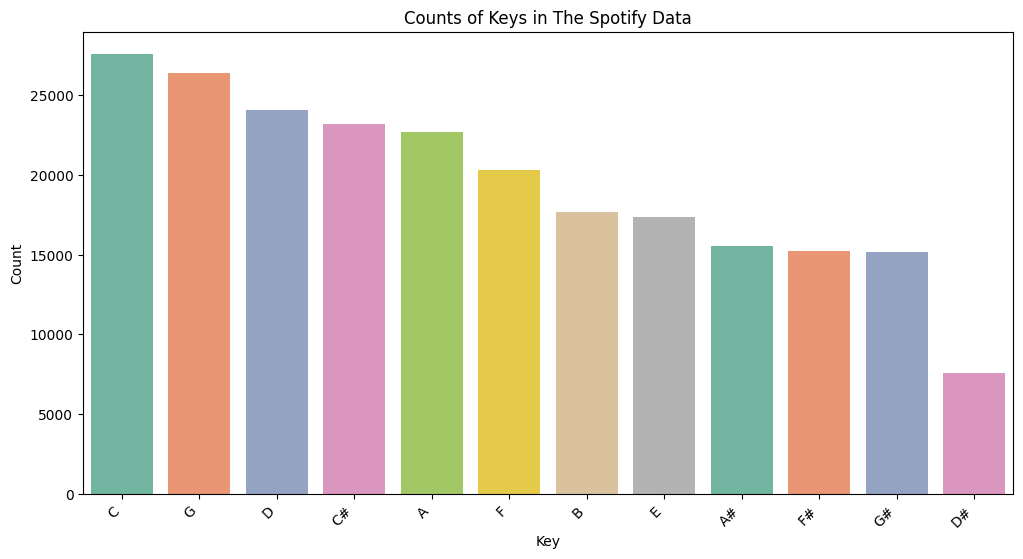

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='key', order=data['key'].value_counts().index, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Counts of Keys in The Spotify Data')
plt.show()

The key 'C' has the highest count, followed by 'G', 'D', 'C#', and so on.
The key 'D#' has the lowest count among the keys listed.

- **Mode**:
    -   There are two unique values in Mode (Major and Minor)

In [30]:
mode_counts = data['mode'].value_counts()
mode_counts

mode
Major    151743
Minor     80981
Name: count, dtype: int64

Visualization of Percentages of Each Mode's values

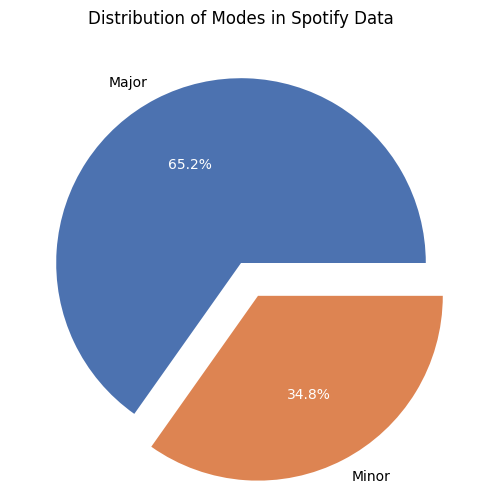

In [31]:
custom_colors = sns.color_palette("deep")

# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    mode_counts, 
    labels=mode_counts.index, 
    autopct='%1.1f%%', 
    explode=[0, 0.2], 
    colors=custom_colors, 
    textprops={'color': 'black'}
)

# Change the color of the percentage text to white
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribution of Modes in Spotify Data')
plt.show()

Most of the tracks in the dataset are in the Major mode, accounting for 65.2% of the total. It appears that a considerable number of the songs possess a Major key signature, which is commonly linked to music that is more joyful and uplifting. The Minor mode represents approximately 34.8% of the dataset. Tracks in the Minor mode often evoke a sense of sadness or melancholy, creating a different emotional experience compared to those in the Major mode.


- **time_signature**: The time-signature of a particular track, which determines the number of beats in each measure and the type of note that receives one beat.

In [32]:
time_signature_count = data['time_signature'].value_counts()
time_signature_count

time_signature
4/4    200759
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: count, dtype: int64

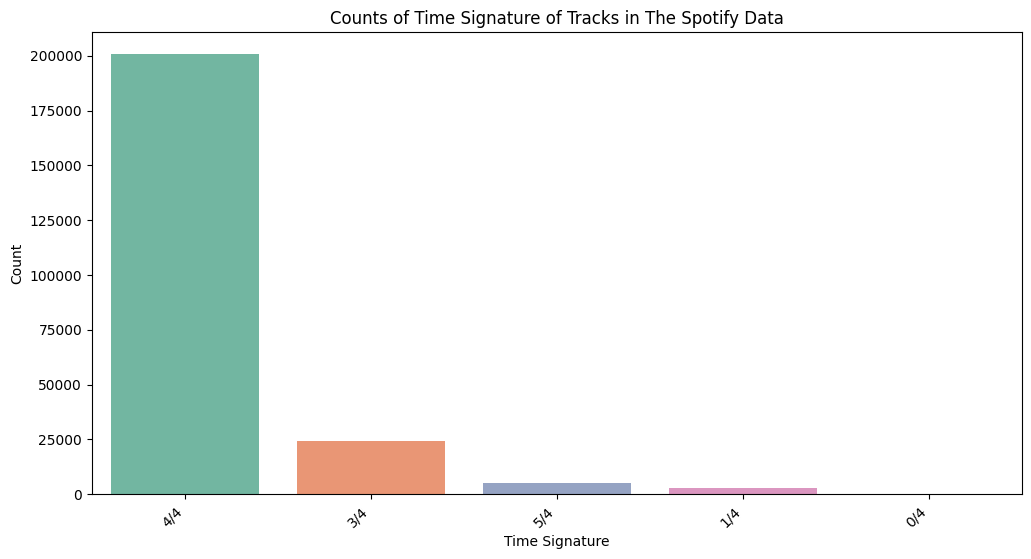

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='time_signature', order=data['time_signature'].value_counts().index, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Counts of Time Signature of Tracks in The Spotify Data')
plt.show()

The 4/4 time signature is by far the most prevalent, with nearly 200,000 tracks. This time signature is frequently found in popular music, which is why it has a strong presence in the dataset. Beside, The 3/4 time signature is quite common, although it is not as popular as the 4/4 time signature. It appears in approximately 25,000 tracks. This time signature is commonly linked to waltzes and specific classical compositions.
Less commonly used time signatures include 5/4, 1/4, and 0/4. These less frequently encountered time signatures have relatively low counts, suggesting their infrequent usage in popular music.

### 3. Data Preprocessing ###

In [34]:
# Generating summary statistics of the numerical columns
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232724.000000,232724.000000,232724.000000,2.327240e+05,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000
mean,41.127490,0.368562,0.554366,2.351218e+05,0.570958,0.148302,0.215010,-9.569896,0.120765,117.666494,0.454919
std,18.189986,0.354768,0.185608,1.189359e+05,0.263456,0.302769,0.198273,5.998215,0.185519,30.898942,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828562e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.777500,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054500,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


The dataset for Spotify songs includes a range of numerical features with different scales, including 'popularity', 'duration_ms', 'loudness', and 'tempo'. The features mentioned here capture various characteristics of songs and are measured using different scales. For instance, the 'popularity' scale ranges from 0 to 100, while 'duration_ms' indicates the duration of songs in milliseconds. 'Loudness' is measured in decibels (dB), with negative values indicating softer songs and positive values indicating louder ones. Similarly, the tempo of a song represents the beats per minute (BPM), which can vary widely across different genres. Given the variations in scales, it is crucial to scale or normalize the features before utilizing classification algorithms or predictive models. This ensures that each feature has an equal contribution to the analysis and model training process.

1. Create new column "duration_seconds" to store the values of "duration_ms" in seconds instead of in milliseconds. By this way, we can scale the duration_ms smaller 1000 times while being able to minimize the loss of data.

In [35]:
data['duration_seconds'] = data['duration_ms']/1000
data['duration_seconds']

0          99.373
1         137.373
2         170.267
3         152.427
4          82.625
           ...   
232720    326.240
232721    282.447
232722    166.960
232723    222.442
232724    323.027
Name: duration_seconds, Length: 232724, dtype: float64

2.  Create new column "tempo_seconds" to store the values of "tempo" in seconds instead of in minute. By this way, we can make tempo and duration's values share a same measurement.

In [36]:
data['tempo_seconds'] = data['tempo'] /60
data['tempo_seconds']

0         2.782817
1         2.900050
2         1.658133
3         2.862633
4         2.342933
            ...   
232720    1.925700
232721    1.897167
232722    1.402250
232723    1.667183
232724    1.898283
Name: tempo_seconds, Length: 232724, dtype: float64

3. This code snippet creates bins and labels to categorize the 'popularity' column into distinct categories. A new column called 'popularity_category' is created, containing category labels determined by the specified bins. This is because the goal of the project to clasify whether a song is popular or not. Therefore, I need to interpret column 'popularity''s values into more meaningful information. The 'popularity_category' will has 4 unique values which are low, medium, high, and very high

In [37]:
def categorize_popularity(popularity):
    if  popularity <= 50:
        return 'not popular'
    elif popularity <= 60:
        return 'neutral'
    else:
        return 'popular'

# Applying the function to create the popularity_category column
data['popularity_category'] = data['popularity'].apply(categorize_popularity)


3. Drop column 'duration_ms' and 'popularity' since they are no need to train classification model

In [38]:
data.drop(['duration_ms', 'popularity', 'tempo'], axis=1, inplace=True)

In [39]:
data.head()

,genre,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,time_signature,valence,duration_seconds,tempo_seconds,popularity_category
0,Movie,Henri Salvador,C'est beau de faire un Show,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,4/4,0.814,99.373,2.782817,not popular
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,4/4,0.816,137.373,2.900050,not popular
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,5/4,0.368,170.267,1.658133,not popular
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,4/4,0.227,152.427,2.862633,not popular
4,Movie,Fabien Nataf,Ouverture,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,4/4,0.390,82.625,2.342933,not popular


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   genre                232724 non-null  object 
 1   artist_name          232724 non-null  object 
 2   track_name           232724 non-null  object 
 3   acousticness         232724 non-null  float64
 4   danceability         232724 non-null  float64
 5   energy               232724 non-null  float64
 6   instrumentalness     232724 non-null  float64
 7   key                  232724 non-null  object 
 8   liveness             232724 non-null  float64
 9   loudness             232724 non-null  float64
 10  mode                 232724 non-null  object 
 11  speechiness          232724 non-null  float64
 12  time_signature       232724 non-null  object 
 13  valence              232724 non-null  float64
 14  duration_seconds     232724 non-null  float64
 15  tempo_seconds        2

Columns with numeric data after data engineering

In [41]:
# Select numeric data
numeric_data = data.select_dtypes(include='number').columns
print("numeric_data", numeric_data)

numeric_data Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'duration_seconds',
       'tempo_seconds'],
      dtype='object')


Visualization of popularity Category

In [42]:
categorize_popularity_count = data['popularity_category'].value_counts()
categorize_popularity_count

popularity_category
not popular    153122
neutral         47067
popular         32535
Name: count, dtype: int64

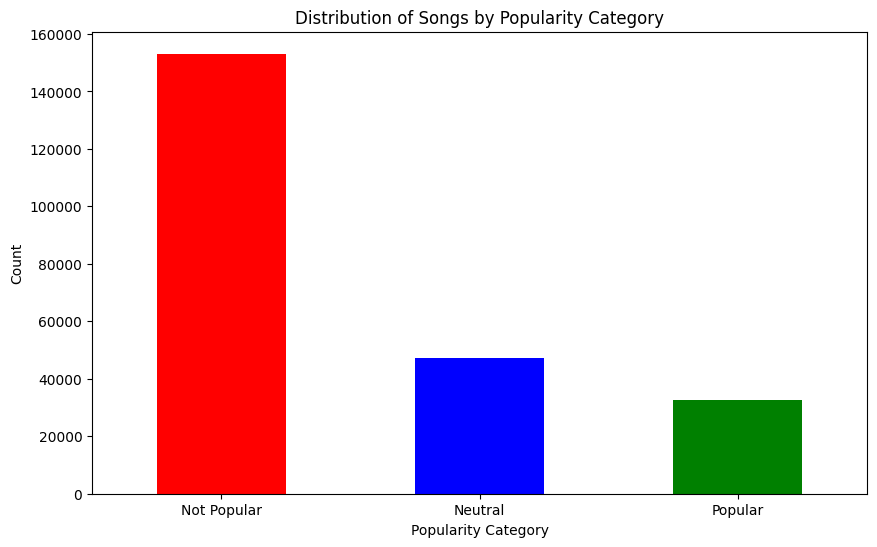

In [43]:
data_dict = {
    'popularity_category': ['Not Popular'] * 153122 + ['Neutral'] * 47067 + ['Popular'] * 32535
}

# Create a DataFrame
df = pd.DataFrame(data_dict)

# Compute the value counts
categorize_popularity_count = df['popularity_category'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
categorize_popularity_count.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.title('Distribution of Songs by Popularity Category')
plt.xticks(rotation=0)
plt.show()

This is the distribution of each group in the popularity category that i just created based on the popularity column.

#### **3. Feature Selection**

##### a/ Filtering Method

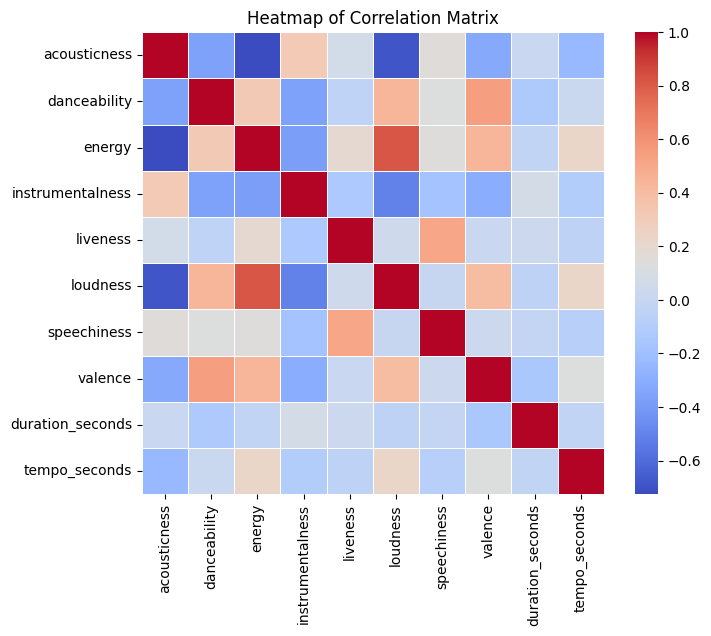

In [44]:
# Calculate the correlation matrix
corr_matrix = data[numeric_data].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

It's clear that there is a significant positive relationship between loudness and energy, while both of these factors have a strong negative relationship with acousticness. We will investigate the possibility of removing one of these columns at a later stage.

In [45]:
# Calculate the correlation matrix
corr_matrix = data[numeric_data].corr().abs()

# Create a mask to ignore the upper triangle of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold (0.9)
droped_columns = [column for column in upper.columns if any(upper[column] > 0.8)]

selected_columns = list(set(data.columns) - set(droped_columns))
to_remove = [ "popularity_category"]
selected_columns = [col for col in selected_columns if col not in to_remove]

print('droped_columns: ', droped_columns)
print('selected_columns: ', selected_columns)

droped_columns:  ['loudness']
selected_columns:  ['valence', 'acousticness', 'danceability', 'instrumentalness', 'genre', 'artist_name', 'duration_seconds', 'liveness', 'track_name', 'tempo_seconds', 'speechiness', 'mode', 'key', 'time_signature', 'energy']


After the evaluation for Correlated Data, the algorithm results in eliminating the column 'loudness', which is also what I expected to do from the brief analysis from the heatmap. From now on, in further step, there is no column 'loudness' in the train data set.

#### **b/ Wrap Method**

1/ **Recursive Feature Elimination Method**

In this part, I will try the recursive feature Elimination method to eliminates features based on their contribution to model performance

In [46]:
# Function to label encode categorical variables
def label_encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Function to train and evaluate models with feature optimization
def recursive_feature_elimination_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the initial model using all features
    model.fit(X_train_scaled, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Use GradientBoostingClassifier if model doesn't support feature importances
    if hasattr(model, 'feature_importances_'):
        importance_model = model
    else:
        print('Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.')
        importance_model = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
        importance_model.fit(X_train_scaled, y_train)

    # Get feature importance
    feature_importances = pd.Series(importance_model.feature_importances_, index=features)
    feature_importances.sort_values(ascending=True, inplace=True)

    # Plot feature importances
    feature_importances.plot.bar(figsize=(20, 6))
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    # Recursive feature elimination
    features_to_remove = []
    f1_full = f1

    print('Doing recursive feature elimination')
    count = 1

    for feature in feature_importances.index:
        print()
        print(f'Testing feature: {feature} ({count} out of {len(features)})')
        count += 1

        temp_model = type(model)()
        temp_model.fit(X_train.drop(columns=features_to_remove + [feature]), y_train)
        y_pred_temp = temp_model.predict(X_test.drop(columns=features_to_remove + [feature]))
        f1_temp = f1_score(y_test, y_pred_temp, average='macro')

        print(f'New Test F1 Score = {f1_temp}')
        print(f'Full dataset F1 Score = {f1_full}')

        diff_f1 = f1_full - f1_temp

        if diff_f1 >= tol:
            print(f'Drop in F1 Score = {diff_f1}')
            print(f'Keep: {feature}')
        else:
            print(f'Drop in F1 Score = {diff_f1}')
            print(f'Remove: {feature}')
            f1_full = f1_temp
            features_to_remove.append(feature)

    print()
    print('-'*60)
    print(f'Total features to remove: {len(features_to_remove)}')

    features_to_keep = [feature for feature in feature_importances.index if feature not in features_to_remove]
    print(f'Total features to keep: {len(features_to_keep)}')

    # Retrain the model with optimized features
    model.fit(X_train[features_to_keep], y_train)
    y_pred_optimized = model.predict(X_test[features_to_keep])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    # Print initial metrics
    print(f'Initial Model Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-'*60)
    # Print optimal metrics
    print(f'Optimized Model Performance:')
    print(f'Accuracy: {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall: {recall_optimized:.4f}')
    print(f'F1 Score: {f1_optimized:.4f}')

This is a brief description what the code cell above does:
- Train the initial set of features on the base model.
- Ranking features based on their importance is a common task in the field of data science. This can be done by examining coefficients for linear models or feature importances for tree-based models.
- Eliminate the feature of lesser significance.
Re-evaluate the model's performance by retraining it on the remaining features.
- Continue iterating through steps 3-5 until you achieve the desired number of features or reach a performance threshold.

Evaluating model: DecisionTreeClassifier


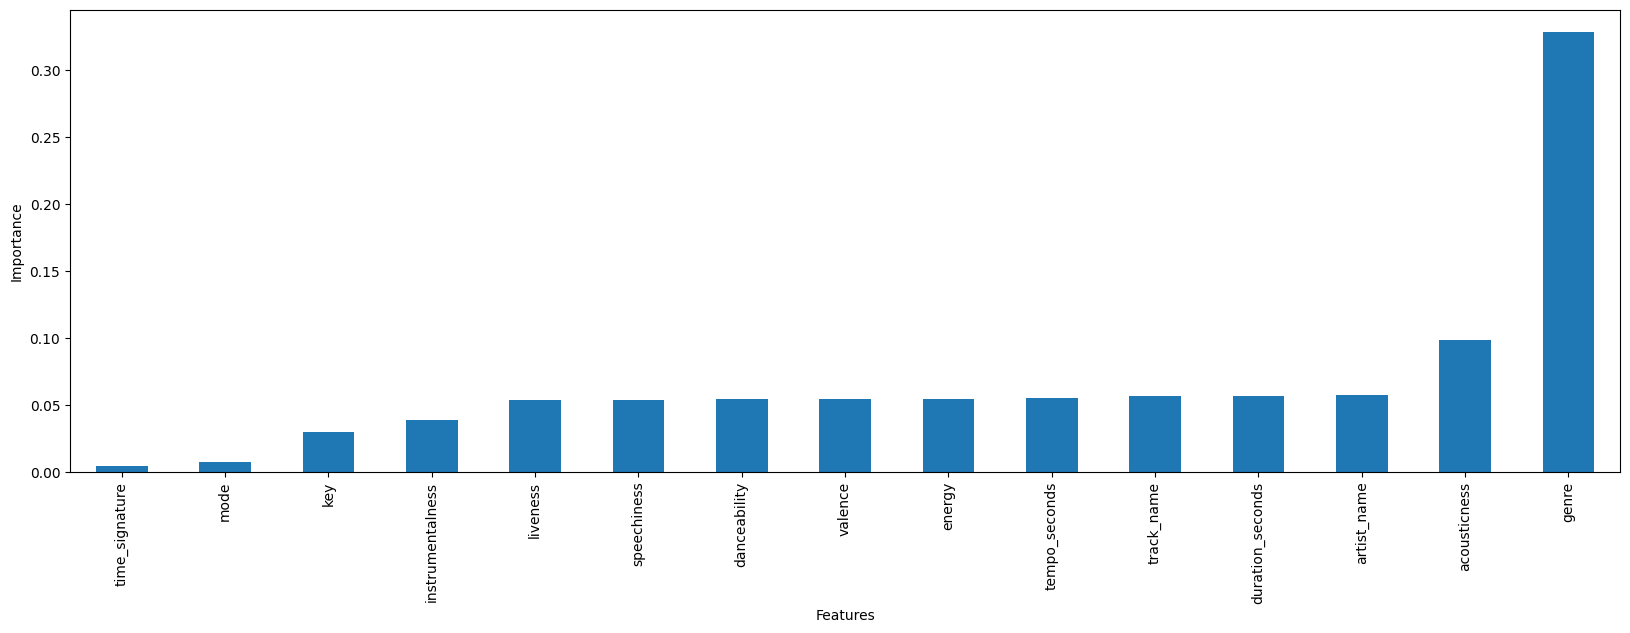

Doing recursive feature elimination

Testing feature: time_signature (1 out of 15)
New Test F1 Score = 0.5449351269802304
Full dataset F1 Score = 0.5450162013061813
Drop in F1 Score = 8.107432595094721e-05
Remove: time_signature

Testing feature: mode (2 out of 15)
New Test F1 Score = 0.5438593457641628
Full dataset F1 Score = 0.5449351269802304
Drop in F1 Score = 0.0010757812160675506
Keep: mode

Testing feature: key (3 out of 15)
New Test F1 Score = 0.5446351621016707
Full dataset F1 Score = 0.5449351269802304
Drop in F1 Score = 0.00029996487855965537
Remove: key

Testing feature: instrumentalness (4 out of 15)
New Test F1 Score = 0.5483044419783792
Full dataset F1 Score = 0.5446351621016707
Drop in F1 Score = -0.003669279876708509
Remove: instrumentalness

Testing feature: liveness (5 out of 15)
New Test F1 Score = 0.5489659330650406
Full dataset F1 Score = 0.5483044419783792
Drop in F1 Score = -0.0006614910866613588
Remove: liveness

Testing feature: speechiness (6 out of 15)
New T

In [55]:
model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

After applying RFE on DecisionTreeClassifier model, this method eliminates 8 features(time_signature, key, instrumentalness, liveness, dancebility, energy, acoousticness, genre) and keep 7 other features. 
The RFE process with the DecisionTreeClassifier effectively determined the most significant features for predicting song popularity. The model that has been optimized, with only the most impactful features included, demonstrates a significant enhancement in performance metrics when compared to the initial model.

The accuracy has increased from 0.6820 to 0.7628.
The precision has increased significantly, going from 0.5438 to 0.6945.
The recall has shown significant improvement, increasing from 0.5463 to 0.7433.
The F1 Score showed a significant improvement, increasing from 0.5450 to 0.7147.

However, there is an interesting part of this result, which is the elimination of feature 'genre'. Although genre, based on the chart, has the most significant impact on the prediction model, the REF method still decide to remove them. This behavior could be because of the genre potentially causing some complications in the model, such as noise or multicollinearity problems. 

In conclusion, since the accuracy, precision, recall is all above 68%, the model DecisionTreeClassifier maybe suceptible to overfitting.

Evaluating model: GaussianNB
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.


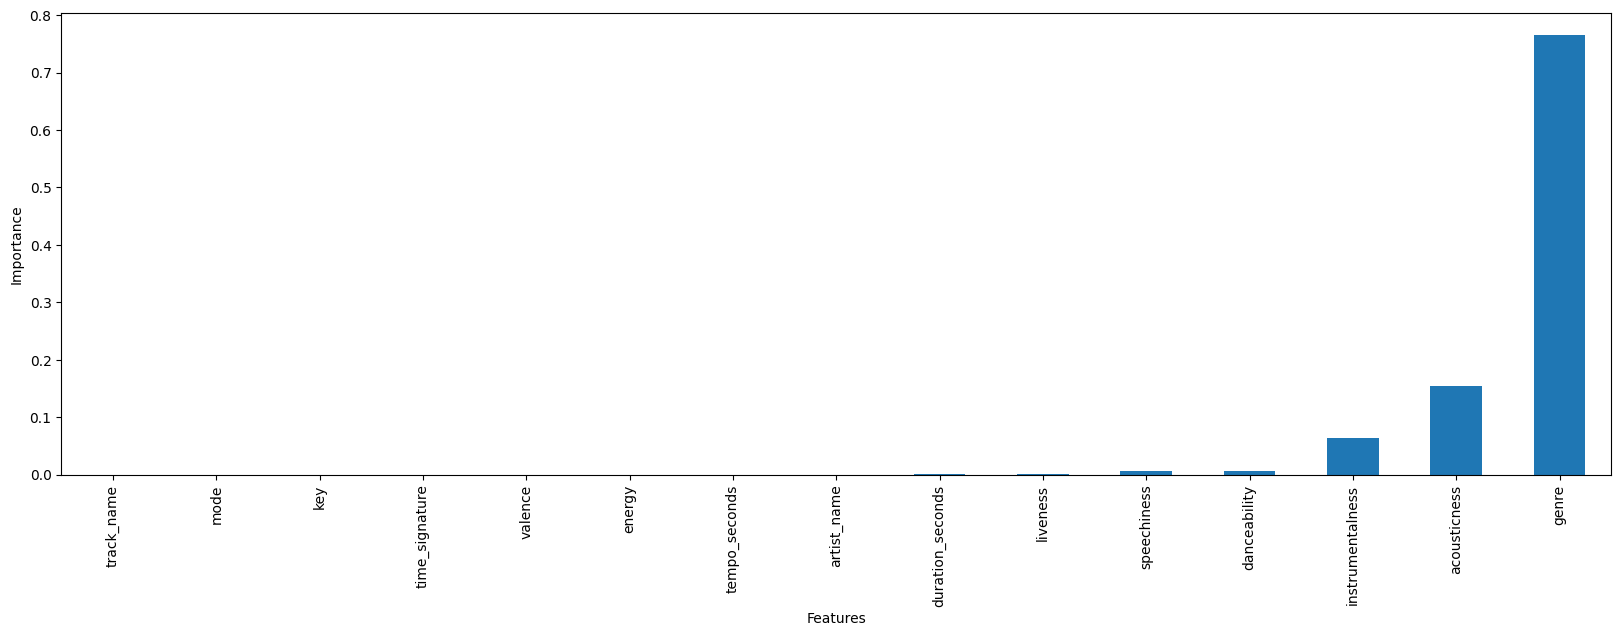

Doing recursive feature elimination

Testing feature: track_name (1 out of 15)
New Test F1 Score = 0.4229589354044401
Full dataset F1 Score = 0.4132999423313907
Drop in F1 Score = -0.009658993073049349
Remove: track_name

Testing feature: mode (2 out of 15)
New Test F1 Score = 0.42262584766096256
Full dataset F1 Score = 0.4229589354044401
Drop in F1 Score = 0.00033308774347751147
Remove: mode

Testing feature: key (3 out of 15)
New Test F1 Score = 0.4226948429481845
Full dataset F1 Score = 0.42262584766096256
Drop in F1 Score = -6.899528722192905e-05
Remove: key

Testing feature: time_signature (4 out of 15)
New Test F1 Score = 0.4319116416423443
Full dataset F1 Score = 0.4226948429481845
Drop in F1 Score = -0.009216798694159811
Remove: time_signature

Testing feature: valence (5 out of 15)
New Test F1 Score = 0.43206358158030866
Full dataset F1 Score = 0.4319116416423443
Drop in F1 Score = -0.00015193993796436267
Remove: valence

Testing feature: energy (6 out of 15)
New Test F1 Score

In [48]:
model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

In terms of GaussianNB, the number of features being eliminated is higher than that of the model DecisionTreeClassifier, which are (track_name, mode, key, time_signature, valence, energy, tempo_seconds, duration_seconds, liveness, danceability). After the RFE process, the accuracy has increased from 0.4928 to 0.5614. The precision saw a slight improvement, going from 0.4373 to 0.4431.
The recall experienced a slight decrease from 0.4797 to 0.4712, but it maintained a relatively stable trend.
The F1 Score has shown improvement, increasing from 0.4133 to 0.4401.

In this model, feature 'genre' is kept, which folowed my expectation after the analysis of the chart. However, the accuracy anf precison amd F1 score are lower than those of DecisionTreeClasifier, and the precison is below 50%. Therefore, this model is not suitable for the prediction of popularoty category. 

Evaluating model: LogisticRegression
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.


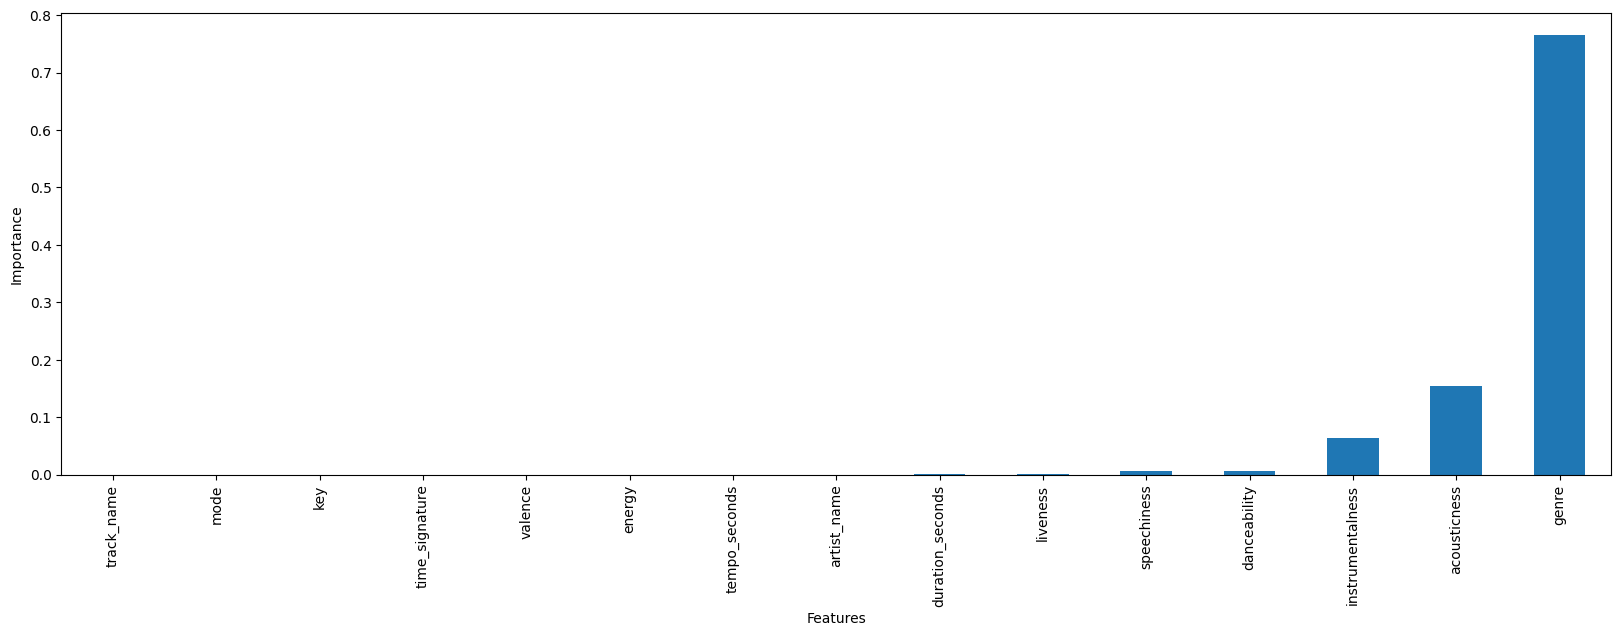

Doing recursive feature elimination

Testing feature: track_name (1 out of 15)
New Test F1 Score = 0.2644290043439686
Full dataset F1 Score = 0.3067213649215392
Drop in F1 Score = 0.042292360577570576
Keep: track_name

Testing feature: mode (2 out of 15)
New Test F1 Score = 0.2644290043439686
Full dataset F1 Score = 0.3067213649215392
Drop in F1 Score = 0.042292360577570576
Keep: mode

Testing feature: key (3 out of 15)
New Test F1 Score = 0.2644290043439686
Full dataset F1 Score = 0.3067213649215392
Drop in F1 Score = 0.042292360577570576
Keep: key

Testing feature: time_signature (4 out of 15)
New Test F1 Score = 0.2644290043439686
Full dataset F1 Score = 0.3067213649215392
Drop in F1 Score = 0.042292360577570576
Keep: time_signature

Testing feature: valence (5 out of 15)
New Test F1 Score = 0.2644290043439686
Full dataset F1 Score = 0.3067213649215392
Drop in F1 Score = 0.042292360577570576
Keep: valence

Testing feature: energy (6 out of 15)
New Test F1 Score = 0.2644290043439686


In [49]:
model = LogisticRegression(max_iter=200, random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

It is worth noting that REF does not remove any features in logistic regression, leading to a slight decrease in model performance (from 0.6580 to 0.6574, 0.4489 to 0.2191). This behavior could be attributed to the subpar performance of logistic regression in classifying three categorical groups of popularity, or perhaps the method's inadequacy in terms of feature selection. 

Evaluating model: RandomForestClassifier


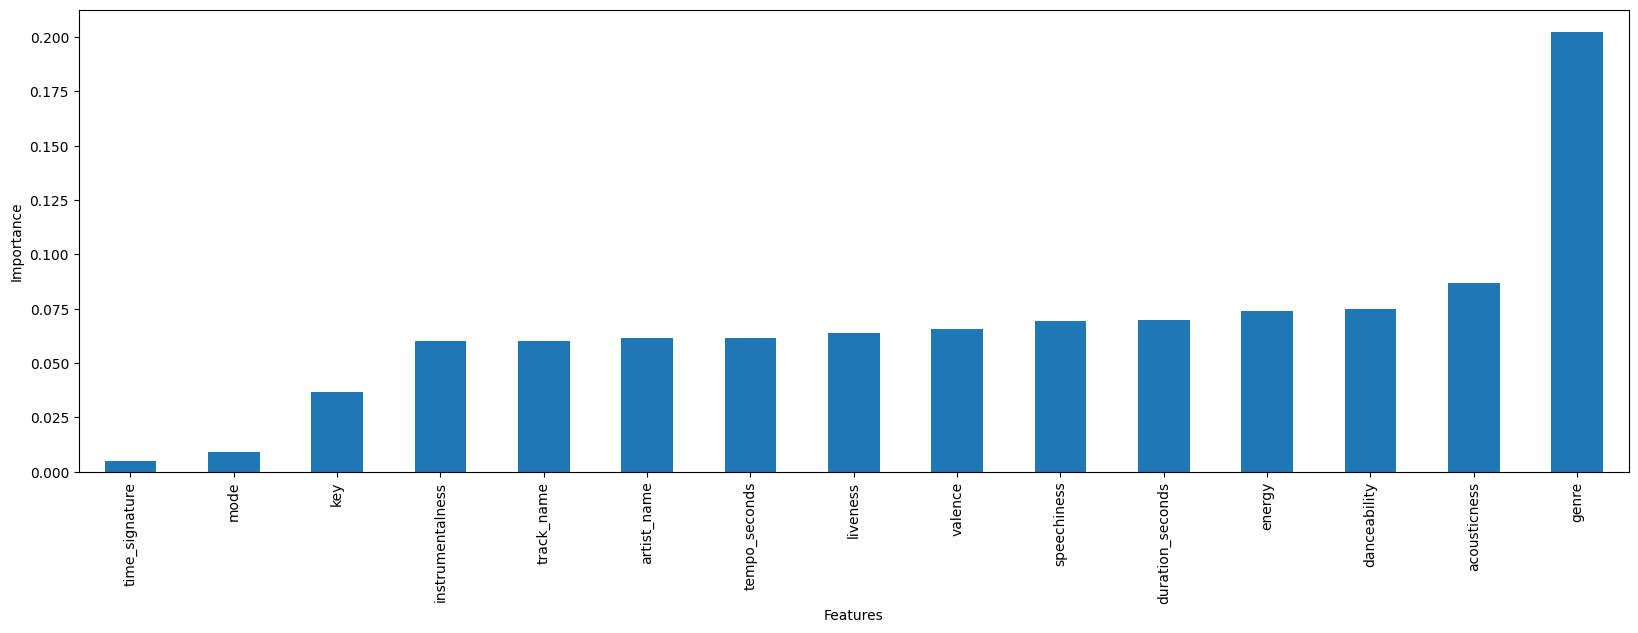

Doing recursive feature elimination

Testing feature: time_signature (1 out of 15)
New Test F1 Score = 0.7421523971377767
Full dataset F1 Score = 0.6661177862846335
Drop in F1 Score = -0.07603461085314323
Remove: time_signature

Testing feature: mode (2 out of 15)
New Test F1 Score = 0.7263172951863157
Full dataset F1 Score = 0.7421523971377767
Drop in F1 Score = 0.015835101951460984
Keep: mode

Testing feature: key (3 out of 15)
New Test F1 Score = 0.7276959257679545
Full dataset F1 Score = 0.7421523971377767
Drop in F1 Score = 0.0144564713698222
Keep: key

Testing feature: instrumentalness (4 out of 15)
New Test F1 Score = 0.7209482963237611
Full dataset F1 Score = 0.7421523971377767
Drop in F1 Score = 0.02120410081401558
Keep: instrumentalness

Testing feature: track_name (5 out of 15)
New Test F1 Score = 0.7236045211364223
Full dataset F1 Score = 0.7421523971377767
Drop in F1 Score = 0.018547876001354435
Keep: track_name

Testing feature: artist_name (6 out of 15)
New Test F1 Score

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")


Through the process of recursive feature elimination, two features were eliminated: time_signature and genre. The optimized model shows substantial improvement across all metrics.
Precision has been enhanced by 0.056 (5.6%)
Precision has been enhanced by 0.1093 (10.93%)
Recall has been enhanced by 0.116 (11.6%)
The F1 Score has seen a significant improvement of 0.1162 (11.62%).

Since the metrics are quite high, we can say that random forest classification model work quite well in clasifying the level of popularity. So far, this result is the best one compared to other three model.

#### **b2/ Recursive Feature Addition Method**

In this part, instead of removing we will try Recursive Feature Addition(RFA) to select the predictive features when training models ( logistic regression, Naive Bayes, Decision Tree Classifier, Random Forest Classifier)


In [50]:
# Function to train and evaluate models with feature addition
def recursive_feature_addition_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Start with the first feature
    initial_features = [features[0]]
    model.fit(X_train_scaled[:, [0]], y_train)
    y_pred = model.predict(X_test_scaled[:, [0]])
    f1_full = f1_score(y_test, y_pred, average='macro')

    # Print initial metrics
    print('-'*60)
    print(f'Initial Model Performance with One Feature ({features[0]}):')
    print(f'F1 Score: {f1_full:.4f}')
    print('-'*60)

    # Recursive feature addition
    features_to_add = [features[0]]
    remaining_features = features[1:]

    print('Doing recursive feature addition')

    while remaining_features:
        feature_scores = []

        for feature in remaining_features:
            current_features_indices = [features.index(f) for f in features_to_add + [feature]]

            model.fit(X_train_scaled[:, current_features_indices], y_train)
            y_pred_temp = model.predict(X_test_scaled[:, current_features_indices])
            f1_temp = f1_score(y_test, y_pred_temp, average='macro')

            feature_scores.append((f1_temp, feature))

        feature_scores.sort(reverse=True)
        best_f1, best_feature = feature_scores[0]

        if best_f1 - f1_full >= tol:
            print(f'Adding feature: {best_feature}')
            features_to_add.append(best_feature)
            remaining_features.remove(best_feature)
            f1_full = best_f1
        else:
            print('No more features to add that improve performance by at least the tolerance threshold.')
            break

        print(f'New F1 Score with added feature(s): {f1_full:.4f}')

    print()
    print('-'*60)
    print(f'Total features added: {len(features_to_add)}')
    print(f'Features added: {features_to_add}')

    # Retrain the model with the selected features
    final_features_indices = [features.index(f) for f in features_to_add]
    model.fit(X_train_scaled[:, final_features_indices], y_train)
    y_pred_optimized = model.predict(X_test_scaled[:, final_features_indices])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    print(f'Optimized Model Performance with Selected Features:')
    print(f'Accuracy:  {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall:    {recall_optimized:.4f}')
    print(f'F1 Score:  {f1_optimized:.4f}')
    print('-'*60)

Recursive Feature Addition (RFA) is a technique frequently employed by professionals in the field to improve their data analysis.Begin with a model that has undergone training using a single feature, typically chosen based on its initial significance or expertise in the field.Evaluate the model's performance, such as by taking into account the F1-score.Include each remaining feature into the current feature set.
Retraining the model and thoroughly evaluating its performance is crucial.Record the improvement in performance compared to the previous version. Identify the feature that provides the most substantial improvement and integrate it into the feature set permanently.
Keep repeating steps 3-4 until adding any remaining feature no longer leads to a significant improvement, as determined by a specified tolerance threshold.Lastly, assess the model's performance once you've added each new feature.Examine the effectiveness of models by integrating different sets of additional features.Choose the feature set that maximizes performance while avoiding the problem of overfitting due to an excessive number of features.

In [51]:
model = LogisticRegression(max_iter=200, random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: LogisticRegression
------------------------------------------------------------
Initial Model Performance with One Feature (valence):
F1 Score: 0.2644
------------------------------------------------------------
Doing recursive feature addition
Adding feature: danceability
New F1 Score with added feature(s): 0.2681
Adding feature: acousticness
New F1 Score with added feature(s): 0.2851
Adding feature: instrumentalness
New F1 Score with added feature(s): 0.2940
Adding feature: genre
New F1 Score with added feature(s): 0.2995
Adding feature: liveness
New F1 Score with added feature(s): 0.3041
Adding feature: duration_seconds
New F1 Score with added feature(s): 0.3073
Adding feature: mode
New F1 Score with added feature(s): 0.3090
Adding feature: tempo_seconds
New F1 Score with added feature(s): 0.3099
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 9

With the valence feature alone, the model achieved an F1 Score of 0.2644, suggesting a moderate trade-off between precision and recall.Every additional feature had a positive impact on the F1 Score.
Significant improvements were observed when incorporating acousticness and instrumentalness, indicating that these features have strong predictive capabilities when combined with valence.
The accuracy metric measures the proportion of correct predictions made (65.85%) it indicates that the model tends to be accurate more frequently than not.
Precision (0.4570): Precision is a metric that measures the proportion of accurate positive predictions out of all the positive predictions made. This relatively low value indicates that there are still many false positives present.
Recall (0.3519): Recall quantifies the proportion of correct positive predictions in relation to the total number of actual positives. Based on the data, it seems that there are a significant number of true positives that are not being detected.
The F1 Score has been optimized to 0.3099, which is an improvement from the initial value of 0.2644. This suggests a better balance between precision and recall. Nevertheless, the value remains low, emphasizing the necessity for more model tuning or the incorporation of other pertinent features.
In conclusion, A set of 9 features (['valence', 'danceability', 'acousticness', 'instrumentalness', 'genre', 'liveness', 'duration_seconds', 'mode', 'tempo_seconds']) has been identified through the recursive feature addition process, which has shown to enhance the model's predictive performance. 

In [52]:
model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: DecisionTreeClassifier
------------------------------------------------------------
Initial Model Performance with One Feature (valence):
F1 Score: 0.2645
------------------------------------------------------------
Doing recursive feature addition
Adding feature: artist_name
New F1 Score with added feature(s): 0.7636
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 2
Features added: ['valence', 'artist_name']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  0.8140
Precision: 0.7493
Recall:    0.7808
F1 Score:  0.7636
------------------------------------------------------------




Using just the valence feature, the F1 Score of the DecisionTreeClassifier model was 0.2645, suggesting a suboptimal trade-off between precision and recall. The F1 Score saw a significant improvement of 0.7636 with the addition of the artist_name feature. It appears that the feature artist_name plays a crucial role in predicting the target variable, especially when combined with valence. Providing more specific information about the metrics, the accuracy of 81.4% indicates that the model has a high rate of correct predictions, demonstrating a notable improvement. In addition, the precision score of 0.7493 indicates that a substantial number of the positive predictions are correct, suggesting a relatively small number of false positives. The recall metric suggests that the model is quite effective at detecting actual positive instances, accurately identifying approximately 78.08% of them. The F1 Score of 0.7636 showcases a notable improvement in precision and recall, highlighting the model's effectiveness after incorporating the artist_name feature.

The iterative process of feature addition revealed that incorporating the valence and artist_name features greatly improves the performance of the model. The significant improvement in F1 Score, accuracy, precision, and recall metrics suggests that these two features have strong predictive capabilities. The DecisionTreeClassifier model shows significant improvement when the artist_name feature is included, resulting in a strong performance with only two features.



In [53]:
model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: GaussianNB
------------------------------------------------------------
Initial Model Performance with One Feature (valence):
F1 Score: 0.2644
------------------------------------------------------------
Doing recursive feature addition
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 1
Features added: ['valence']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  0.6574
Precision: 0.2191
Recall:    0.3333
F1 Score:  0.2644
------------------------------------------------------------




The F1 Score of the initial model performance with the valence feature is 0.2644. No further enhancements were discovered to enhance the model's performance beyond this threshold. No additional features were found during the feature addition process that could improve the model's performance beyond the tolerance threshold, even when combined with valence. The accuracy score of the model is 0.6574, meaning that it correctly predicts approximately 65.74% of the instances. Nevertheless, the accuracy alone may not accurately reflect the overall performance, considering the disparity between precision and recall.The precision is quite low, indicating that a small percentage of the positive predictions are accurate. It suggests a significant number of incorrect positive results.The recall is quite low, as the model only correctly identifies 33.33% of the true positive instances.The F1 Score remains unchanged at 0.2644, suggesting that there has been no improvement from the initial model. It appears that the model has difficulty finding the right balance between precision and recall.

The performance of the GaussianNB model suggests that relying solely on valence is not enough to achieve a strong predictive capability. Based on the low precision and recall values, it seems that the GaussianNB model may not be the best fit for this dataset or problem. It's worth considering if there are any other features that could potentially enhance performance.


In [57]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: RandomForestClassifier
------------------------------------------------------------
Initial Model Performance with One Feature (valence):
F1 Score: 0.2645
------------------------------------------------------------
Doing recursive feature addition
Adding feature: artist_name
New F1 Score with added feature(s): 0.7388
Adding feature: track_name
New F1 Score with added feature(s): 0.7720
Adding feature: key
New F1 Score with added feature(s): 0.7749
Adding feature: liveness
New F1 Score with added feature(s): 0.7796
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 5
Features added: ['valence', 'artist_name', 'track_name', 'key', 'liveness']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  0.8339
Precision: 0.8168
Recall:    0.7516
F1 Score:  0.7796
----------------------------

RFA process has indentified 5 five features that boosts the performance of the model.With only the valence feature, the RandomForestClassifier model had an F1 Score of 0.2645. Adding 'artist_name' boosted the F1 Score to 0.7388, suggesting it is a highly predictive feature. Meanwhile, track_name imporived the F1 Score to 0.7720 and 'key' enhance F1 Score to 0.7749. Finally, 'liveness' adds 0.047 to F1 Score, which means that it has provide certain impact to the prediction.
Through a meticulous process, a set of 5 features was discovered that greatly improves the performance of the RandomForestClassifier model. The significant improvement in F1 Score, accuracy, precision, and recall metrics suggests that these features have strong predictive capabilities.The artist_name feature had a major impact, indicating its importance for the model's predictive ability.
Small enhancements in track_name, key, and liveness demonstrate their significance when combined with the main features.


#### **4.Feature Selection Using Embedded-Lasso Method**

For this part, we will explore the Lasso method, a powerful linear regression technique that combines feature selection and regularization.

This  code cell below is used for analyzing and comparing the performance of logistic regression models with various sets of features. By examining the impact of feature selection on model accuracy, it provides insights into the effectiveness of different feature sets. The slight improvement in accuracy with the selected features indicates that a more suitable set of features was chosen, whereas the L2 approach did not offer any notable advantage in this particular scenario.

In [54]:
from sklearn.feature_selection import SelectFromModel

X = data[selected_columns]
y = data['popularity_category']
feature_names = selected_columns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Classification with all features
clf_all_features = LogisticRegression(max_iter=1000, random_state=42)
clf_all_features.fit(X_train, y_train)
y_pred_all = clf_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all:.4f}')
print('-'*60)
# 2. Feature selection using L1 regularization (Lasso)
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
clf_l1.fit(X_train, y_train)

# Select features
model_l1 = SelectFromModel(clf_l1, prefit=True)
X_train_l1 = model_l1.transform(X_train)
X_test_l1 = model_l1.transform(X_test)
selected_features_l1 = model_l1.get_support(indices=True)
print(f'Selected {len(selected_features_l1)} features by L1: {np.array(feature_names)[selected_features_l1]}')

# Classification with L1 selected features
clf_l1_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l1_selected.fit(X_train_l1, y_train)
y_pred_l1 = clf_l1_selected.predict(X_test_l1)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 selected features: {accuracy_l1:.4f}')
print('-'*60)

# 3. Feature selection using L2 regularization (Ridge)
clf_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
clf_l2.fit(X_train, y_train)

# Select features
model_l2 = SelectFromModel(clf_l2, prefit=True)
X_train_l2 = model_l2.transform(X_train)
X_test_l2 = model_l2.transform(X_test)
selected_features_l2 = model_l2.get_support(indices=True)
print(f'Selected {len(selected_features_l2)} features by L2: {np.array(feature_names)[selected_features_l2]}')

# Classification with L2 selected features
clf_l2_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l2_selected.fit(X_train_l2, y_train)
y_pred_l2 = clf_l2_selected.predict(X_test_l2)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L2 selected features: {accuracy_l2:.4f}')

Accuracy with all features: 0.6574
------------------------------------------------------------
Selected 13 features by L1: ['valence' 'acousticness' 'danceability' 'instrumentalness' 'genre'
 'duration_seconds' 'liveness' 'tempo_seconds' 'speechiness' 'mode' 'key'
 'time_signature' 'energy']
Accuracy with L1 selected features: 0.6580
------------------------------------------------------------
Selected 1 features by L2: ['duration_seconds']
Accuracy with L2 selected features: 0.6574


Regarding the outcomes of L1 Regularization (Lasso): Using Lasso regularization to select 13 features led to a slight increase in accuracy, going from 0.6574 to 0.6580. It is evident that the chosen features (a total of 13) have proven to be valuable in improving the predictive capability of the model, potentially mitigating the risk of overfitting.

In terms of the outcomes of L2 Regularization(Ridge): Accuracy was not improved by using ridge regularization and choosing just one feature (duration_seconds). It appears that this model and dataset are too dependent on one feature.

**5/ Conclusion**

Through the utilization of correlation analysis, recursive feature elimination, recursive feature addition, and the Lasso regularization technique, we effectively tackled the intricacies of high-dimensional data. Finding the right balance between reducing features and keeping the model complexity is crucial for achieving accurate predictions while still maintaining interpretability.
The insights obtained from this feature selection process are essential for the development of future models. With a thorough understanding of relevant features, we can create powerful and efficient models to tackle the specific prediction task at hand.

Spotify-Song is an extensive dataset that allows us to delve into and analyze the factors that contribute to a song's popularity. During this data exploration, it becomes clear that only a small number of songs are considered popular, and the popularity score (ranging from 0 to 100) lacks significant meaning. As a result, I have made the decision to divide the popularity column into three groups. During the training model phase, we have observed that the RandomForestClassifier and DecisionTree models have been performing exceptionally well in accurately categorizing songs as popular, neutral, or not popular. Their accuracy percentages have been consistently high. We have experimented with various feature selection methods, such as filtering, wrapper, and embedded-Lasso. These methods have produced a range of feature sets that can be used for prediction. From my perspective, the Filtering Method seems to be the most logical and efficient approach for this dataset, given its suitability for a linear regression model. When it comes to the duration and resource usage, the Wappred Method (Recursive Feature Elimination and Recursive Feature Addition) stands out as the most time-consuming and memory-intensive option, making it the priciest choice. When it comes to predicting results, the Recursive Feature Addition Method works exceptionally well with the DecisionTree and RandomForestClassifier models. The accuracy percentage is truly impressive. The logistic regression model yields comparable results for both the Wrapper Method and the Embedded-Lasso Method. This suggests that the model may have reached its limit in accurately categorizing popularity levels. Meanwhile, the Naive Bayes model performs efficiently after using the Recursive Feature Addition method. Ultimately, while most models have a decent prediction rate (above 60%), Random Forest Classifier and Decision Tree Classifier appear to be the most appropriate for predicting the popularity level of a song using the Spotify-Song Dataset.

However, in my opinion, given the setup and high accuracy of the Random Forest Classifier and Decision Tree Classifier, there is a possibility that the model may be prone to overfitting. For a more comprehensive model and data exploration, it would be beneficial to involve a data engineer or visualize the correlation between the popularity column and other features.